In this project, we will analyzing bank loan dataset and present three classification model which can predict bank customers probability that they can get a loan from bank or not! lets go!

# IMPORT LIBARIES

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # data visualization
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns  # data visualization
from sklearn.model_selection import train_test_split  # train test split
from sklearn.linear_model import LogisticRegression  # logisyic regression model
from sklearn.neighbors import KNeighborsClassifier  # KNN model
from sklearn.naive_bayes import GaussianNB  # Gaussian model
from sklearn.naive_bayes import MultinomialNB  # Multinomial model
from sklearn import metrics  # data evaluation
from sklearn.model_selection import KFold  # Kfold cross validation
from sklearn.model_selection import cross_val_score  # cross validation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
import warnings

# DATA DESCRIPTION

In [2]:
warnings.simplefilter(action='ignore')  # ignoring warnings
plt.style.use('seaborn')

In [3]:
df = pd.read_csv(r'C:\Users\sang.nguyendinh\Desktop\Bank_Personal_Loan_Modelling(1).csv')  # calling data

# DATA ANALYZING

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [5]:
df.shape

(5000, 14)

In [6]:
df.drop("ID", axis=1, inplace=True) # droping ID column from data frame

In [7]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Checking negative value of Expreince column

In [8]:
df[df['Experience']<0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,94303,4,2/30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1/70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0/30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1/75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0/20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2/40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2/30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0/30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1/70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7/20,1,0,0,1,0,0,1


limit_output extension: Maximum message size of 10000 exceeded with 14767 characters

Oops! look! there is some NEGATIVE values in 'Experience' column which is IMPOSIBLE!
I found that they must be positive numbers which signed as negative by speaking with dataset owner! we must change them to positive numbers!

In [9]:
df['Experience']= abs(df['Experience']) 

In [10]:
# number of negative values in 'Experience' column
np.sum((df['Experience']<0).ravel())

0

In [11]:
# number of null values for each column
data_types = pd.DataFrame(df.dtypes, columns=['Data Types'])
count_of_nulls = pd.DataFrame(df.isnull().sum(), columns=['Count of Nulls'])

Check_data = pd.concat([data_types, count_of_nulls], axis='columns')
Check_data

,Data Types,Count of Nulls
Age,int64,0
Experience,int64,0
Income,int64,0
ZIP Code,int64,0
Family,int64,0
CCAvg,object,0
Education,int64,0
Mortgage,int64,0
Personal Loan,int64,0
Securities Account,int64,0


In [12]:
# duplicated values for each column
duplicate = df[df.duplicated()] # duplicated values in each to rows of data frame
duplicate

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


There aren't no null and duplicated values in dataframe

## Columns unique values

In [13]:
# printing the unique values for each columns
for i in df.columns:
    print('sum of unique values in ', i , ' column :' , df[i].nunique())
    print(i , 'column unique values:')
    print(df[i].unique())
    print('-'*40)

sum of unique values in  Age  column : 45
Age column unique values:
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
----------------------------------------
sum of unique values in  Experience  column : 44
Experience column unique values:
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 34  0 38 40 33  4 42 43]
----------------------------------------
sum of unique values in  Income  column : 162
Income column unique values:
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 17

as you see there is some issues with 'CCAvg' column!
in this column ' / ' used instead of ' . ' which is NOT acceptable by python! actually python dont know this kind of value as float and no numerical actions is working on this column!
we must to change the ' / ' to ' . ' and change the data type to float too!

In [14]:
df.dtypes # features data type

Age                    int64
Experience             int64
Income                 int64
ZIP Code               int64
Family                 int64
CCAvg                 object
Education              int64
Mortgage               int64
Personal Loan          int64
Securities Account     int64
CD Account             int64
Online                 int64
CreditCard             int64
dtype: object

In [15]:
df['CCAvg'] = df['CCAvg'].str.replace('/' , '.').astype(float) # changing ' / ' to ' . ' and change the data type to float!
df['CCAvg'].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [16]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [17]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [18]:
df.shape

(5000, 13)

##  Analyzing Zipcode

one of the most AMAZING challenge in this notebook is analyzing and working with 'ZIP Code' column!
there are many zip code which contain 5 number length and some few others contain 4 number length! we must analyzing all of the zip codes and if there is any noise, drop it!

In [19]:
df['ZIP Code'].nunique()

467

In [20]:
list_zipcode=df['ZIP Code'].unique()
list_zipcode

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [21]:
!pip install zipcodes

In [22]:
import zipcodes as zcode 

In [23]:
#creating a dictionary of county by using library zipcode and matching method.
dict_zip={}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype('str'))
    if len(my_city_county)==1: # if  zipcode is present then get county else, assign zipcode to county
        county=my_city_county[0].get('county')
    else:
        county=zipcode
    
    dict_zip.update({zipcode:county})

In [24]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

limit_output extension: Maximum message size of 10000 exceeded with 13233 characters

# DATA VISUALIZATION & PREDICTION MODEL

In [25]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [26]:
# Categorical features bar plots

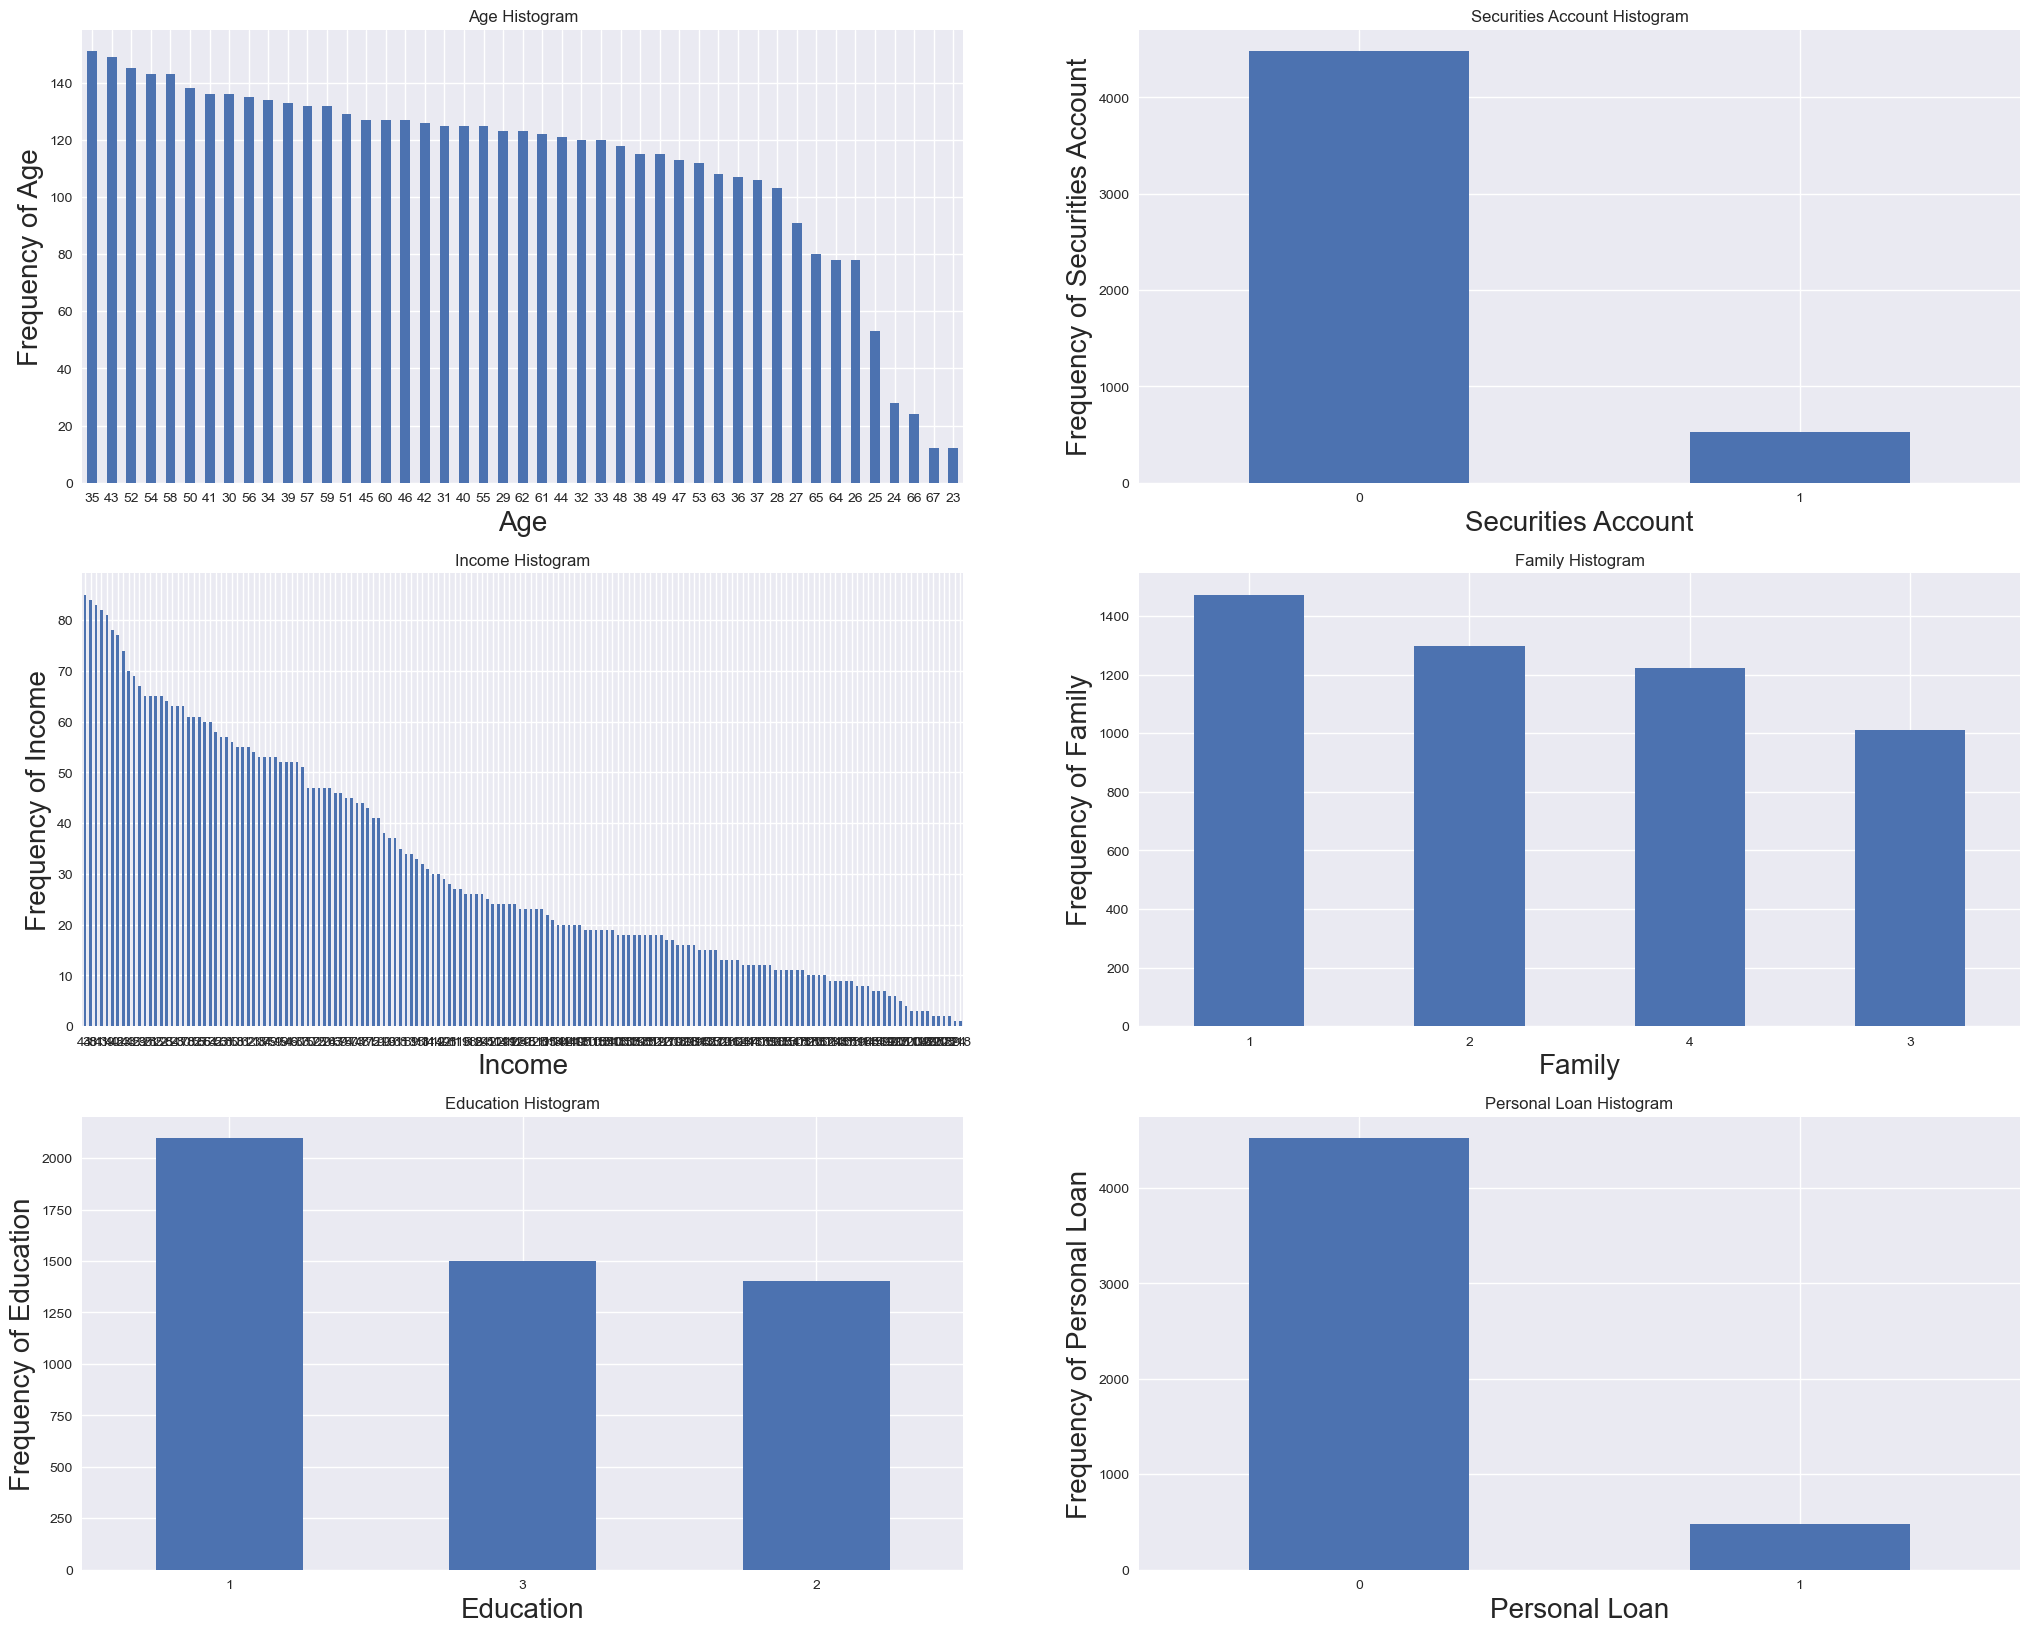

In [27]:
# bar plot 
plt.rcParams.update({'font.size': 20}) # ploting fontsize

plt.figure(figsize=(25, 20)) # ploting chart size

plt.subplot(3,2,1) # current plot location side of other plots
plt1 = df.Age.value_counts().plot(kind='bar') # plot type : bar plot
plt.title('Age Histogram') # plot title
plt1.set(xlabel = 'Age', ylabel='Frequency of Age') # plot labels
plt.xticks(rotation = 0) 

plt.subplot(3,2,2)
plt1 = df['Securities Account'].value_counts().plot(kind='bar')
plt.title('Securities Account Histogram')
plt1.set(xlabel = 'Securities Account', ylabel='Frequency of Securities Account')
plt.xticks(rotation = 0)

plt.subplot(3,2,3)
plt1 = df.Income.value_counts().plot(kind='bar')
plt.title('Income Histogram')
plt1.set(xlabel = 'Income', ylabel='Frequency of Income')
plt.xticks(rotation = 0)

plt.subplot(3,2,4)
plt1 = df.Family.value_counts().plot(kind='bar')
plt.title('Family Histogram')
plt1.set(xlabel = 'Family', ylabel='Frequency of Family')
plt.xticks(rotation = 0)

plt.subplot(3,2,5)
plt1 = df.Education.value_counts().plot(kind='bar')
plt.title('Education Histogram')
plt1.set(xlabel = 'Education', ylabel='Frequency of Education')
plt.xticks(rotation = 0)


plt.subplot(3,2,6)
plt1 = df['Personal Loan'].value_counts().plot(kind='bar')
plt.title('Personal Loan Histogram')
plt1.set(xlabel = 'Personal Loan', ylabel='Frequency of Personal Loan')
plt.xticks(rotation = 0)

plt.show()

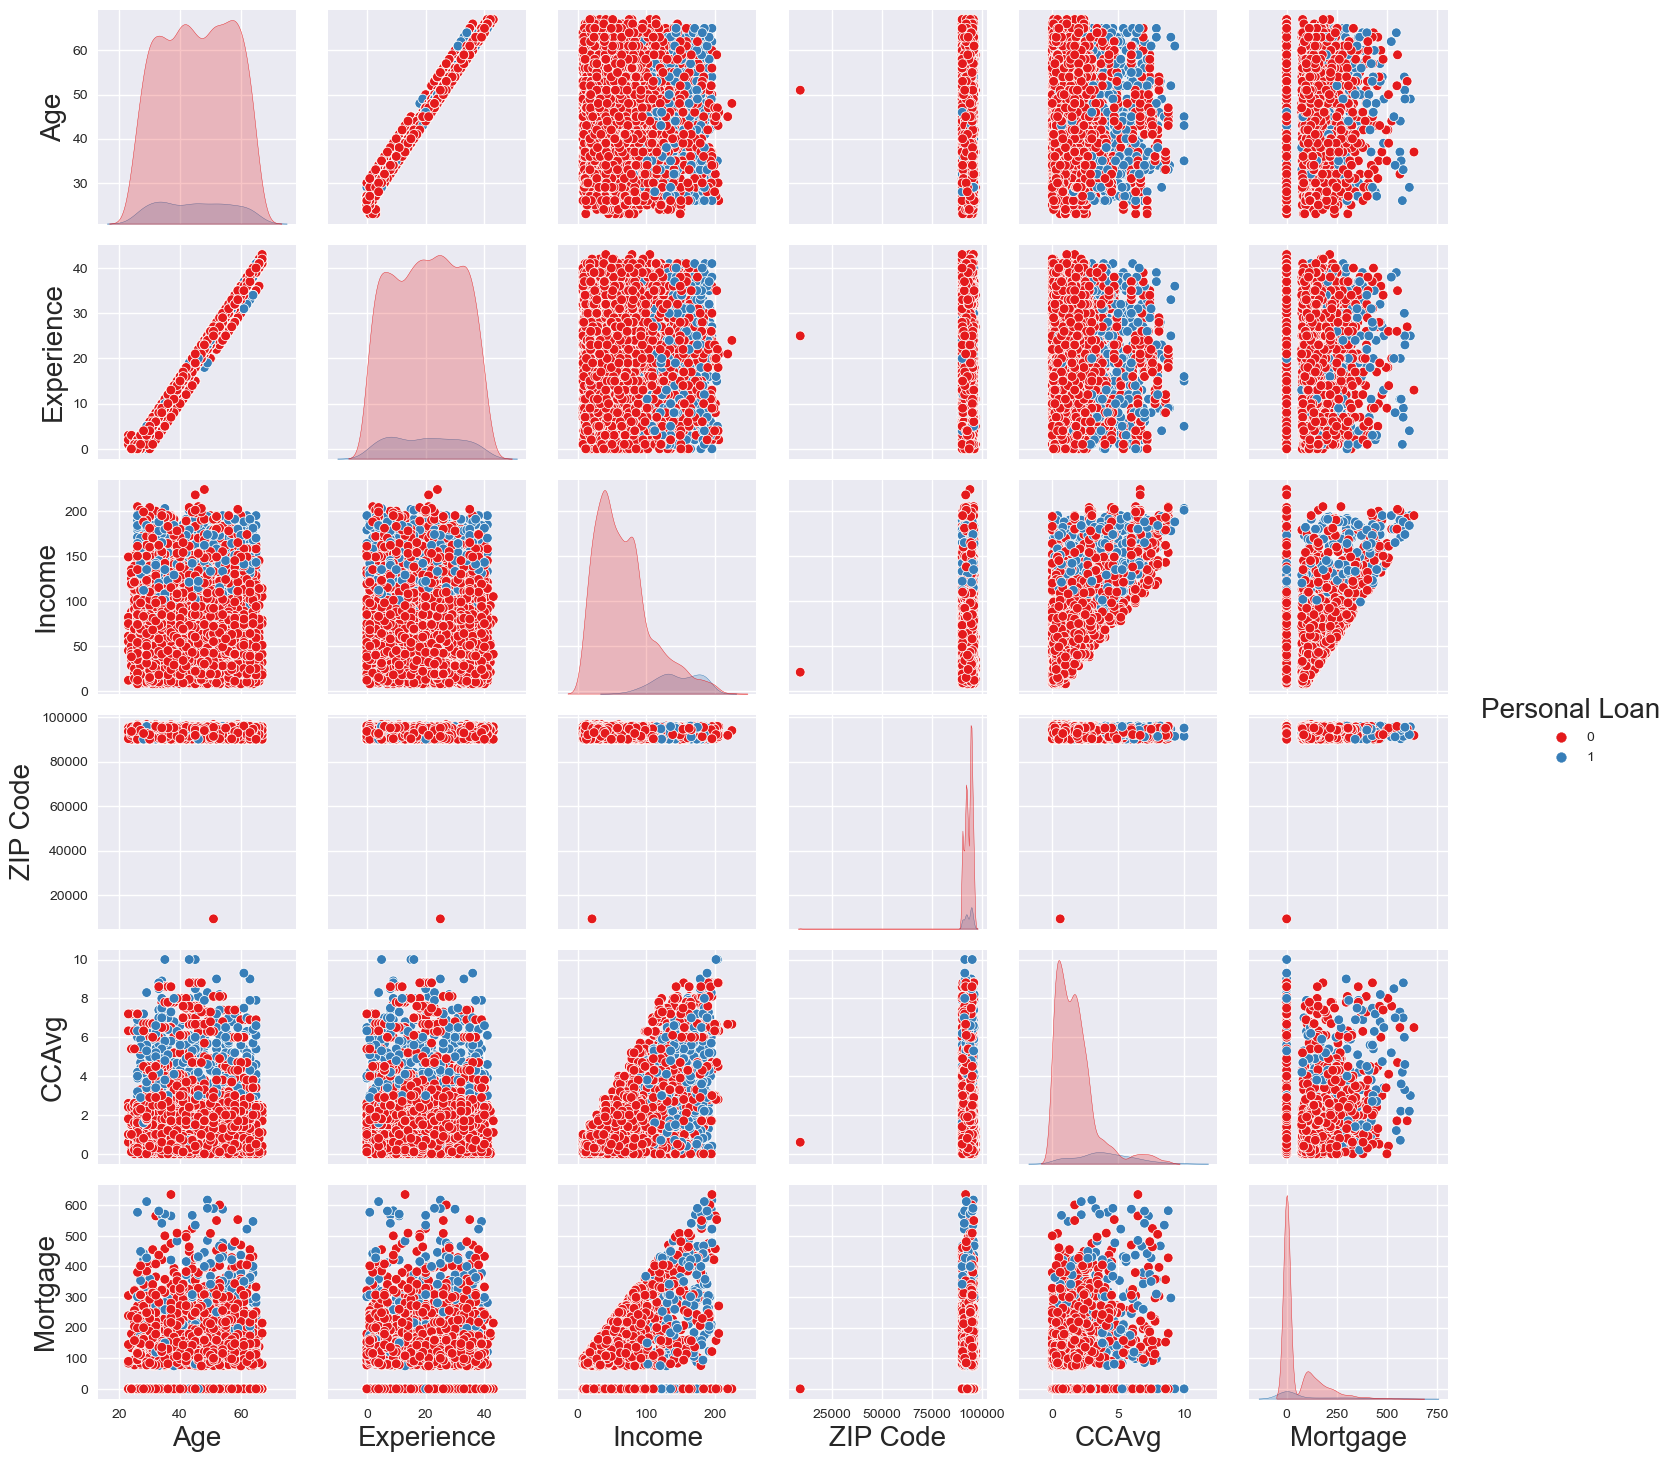

In [28]:
plot = sns.pairplot(
    df[['Age','Experience','Income','ZIP Code','CCAvg','Mortgage','Personal Loan']],
    vars=None,
    hue='Personal Loan',
    palette='Set1',
    diag_kind='kde',
)

## Numerical features plots

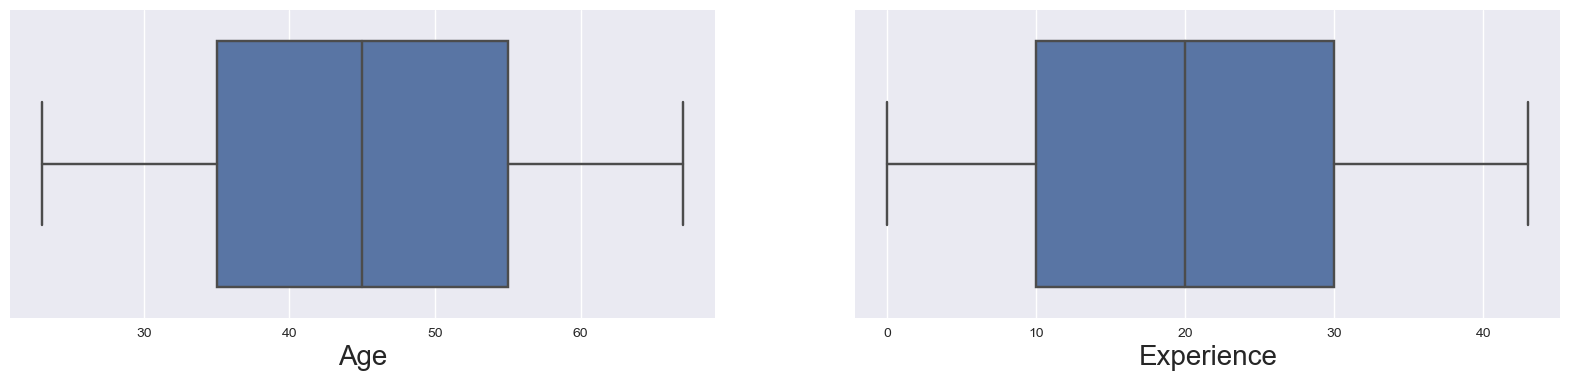

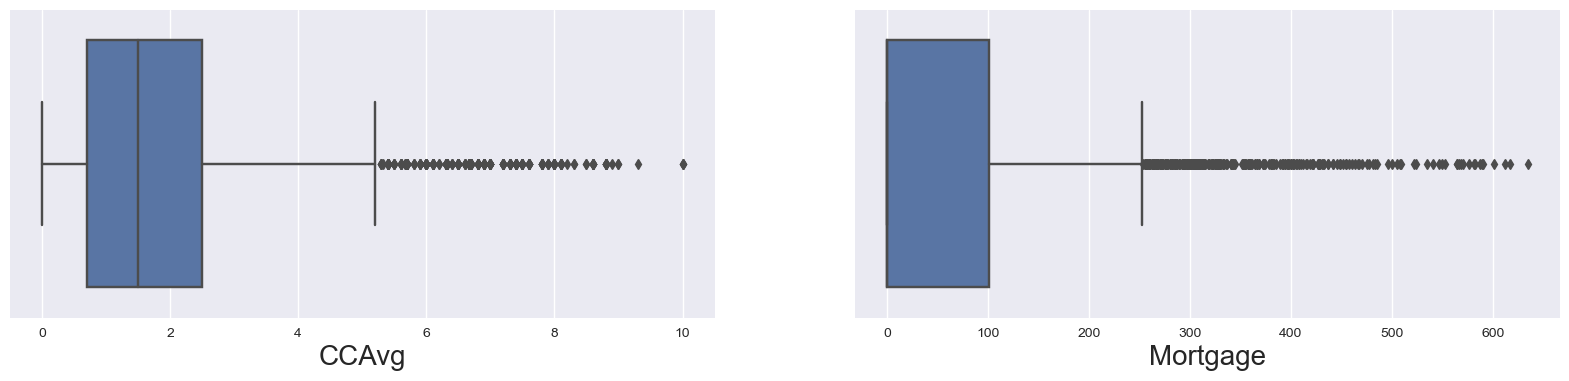

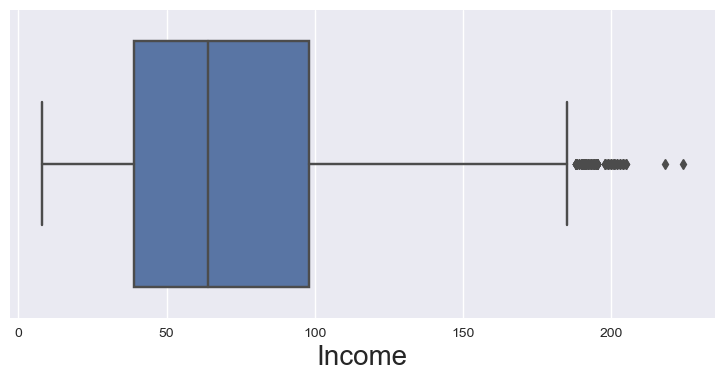

In [29]:
Numerical = ['Age','Experience','CCAvg','Mortgage','Income']
i = 0
while i<5:
    fig = plt.figure(figsize = [20,4])
    plt.subplot(1,2,1)   #(one row, two plots, first one)
    sns.boxplot(x = Numerical[i], data=df) # read each one, from Data
    i += 1
    if i==5:
        break
    plt.subplot(1,2,2)
    sns.boxplot(x = Numerical[i], data=df) # row one , second plot
    i += 1
    plt.show()

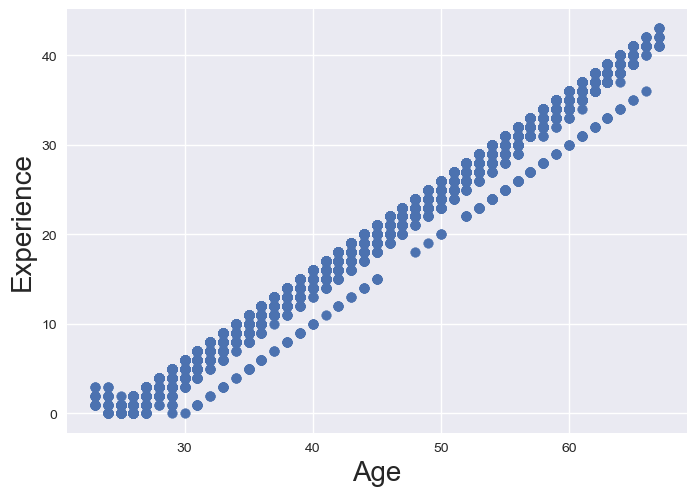

In [30]:
plt.scatter(df['Age'] , df['Experience'])
plt.xlabel('Age')
plt.ylabel('Experience')
plt.grid(True)

plt.show()

look there is a linear relationship between 'Age' and 'Experience' column! it means that they must have a high positive correlation!

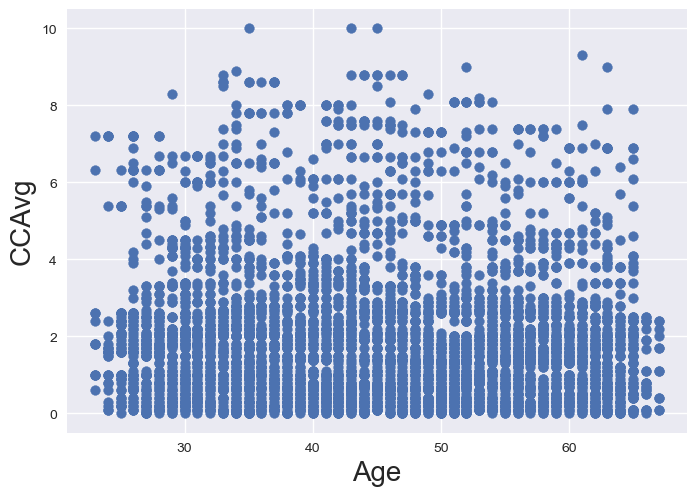

In [31]:
plt.scatter(df['Age'] , df['CCAvg'])
plt.xlabel('Age')
plt.ylabel('CCAvg')
plt.grid(True)

plt.show()

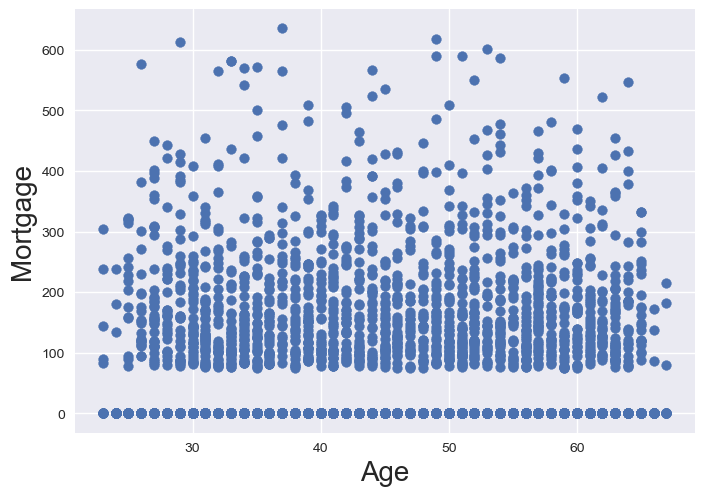

In [32]:
plt.scatter(df['Age'] , df['Mortgage'])
plt.xlabel('Age')
plt.ylabel('Mortgage')
plt.grid(True)

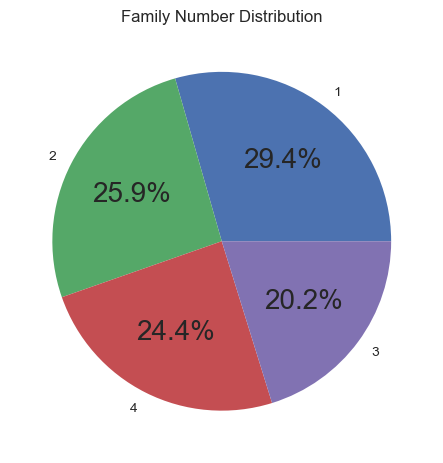

In [33]:
y = df.Family.value_counts().values
#Mylabels = df.Family.drop_duplicates()
mylabels = df['Family'].value_counts().index

plt.pie(y , labels = mylabels , autopct='%1.1f%%')
plt.title('Family Number Distribution')
plt.show() 

Family: Around 29% of the customer's family size is 1, 26% is 2, 20% is 3 and 24% is 4.

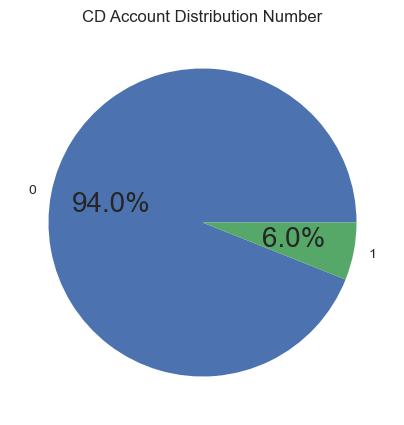

In [34]:
plt.figure(figsize=(5, 5))


y = df['CD Account'].value_counts().values
#Mylabels = df.Family.drop_duplicates()
mylabels = df['CD Account'].value_counts().index

plt.pie(y , labels = mylabels , autopct='%1.1f%%')
plt.title('CD Account Distribution Number')
plt.show() 

CD Account: 94% of customers do not have a CD account with the bank.

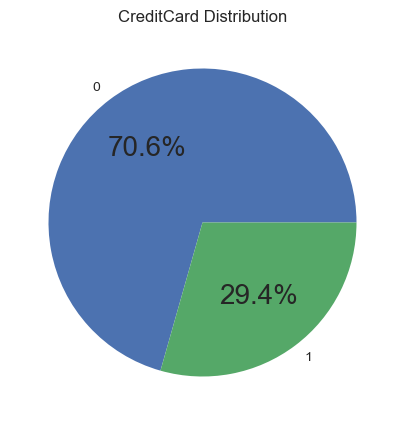

In [35]:
plt.figure(figsize=(5, 5))


y = df['CreditCard'].value_counts().values
#Mylabels = df.Family.drop_duplicates()
mylabels = df['CreditCard'].value_counts().index

plt.pie(y , labels = mylabels , autopct='%1.1f%%')
plt.title('CreditCard Distribution')
plt.show() 

CreditCard: Around 71% of customers do not use credit cards.

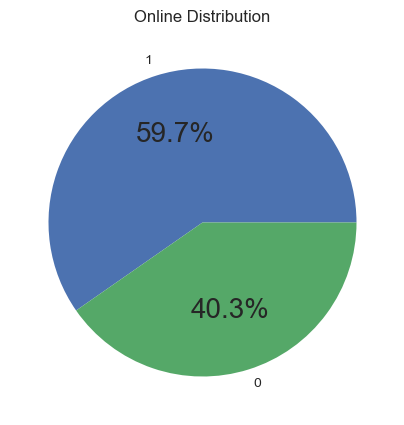

In [36]:
plt.figure(figsize=(5, 5))


y = df['Online'].value_counts().values
#Mylabels = df.Family.drop_duplicates()
mylabels = df['Online'].value_counts().index

plt.pie(y , labels = mylabels , autopct='%1.1f%%')
plt.title('Online Distribution')
plt.show() 

Online: Around 60% of customers use internet banking facilities.

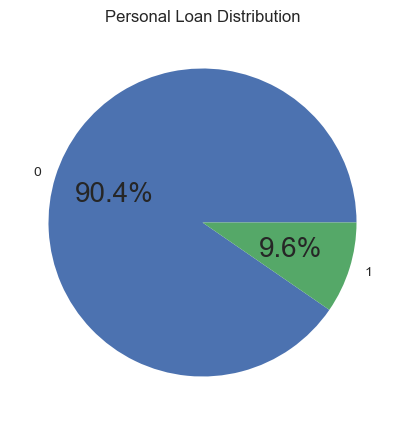

In [37]:
plt.figure(figsize=(5, 5))
y = df['Personal Loan'].value_counts().values
#Mylabels = df.Family.drop_duplicates()
mylabels = df['Personal Loan'].value_counts().index

plt.pie(y , labels = mylabels , autopct='%1.1f%%')
plt.title('Personal Loan Distribution')
plt.show() 

dataset is imbalanced because target unique values count is'nt same!

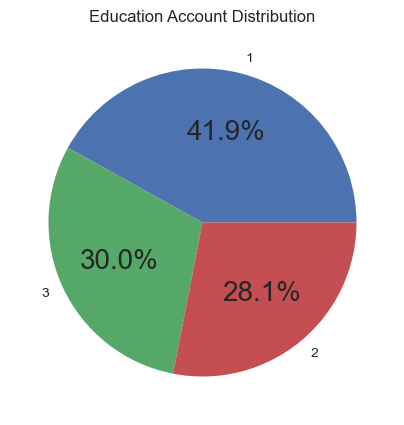

In [38]:
plt.figure(figsize=(5, 5))
y = df['Education'].value_counts().values
#Mylabels = df.Family.drop_duplicates()
mylabels = df['Education'].value_counts().index

plt.pie(y , labels = mylabels , autopct='%1.1f%%')
plt.title('Education Account Distribution')
plt.show() 

Education: 42% of candidates have bachelor's degree and 30% have master's degree and 28% are professionals.

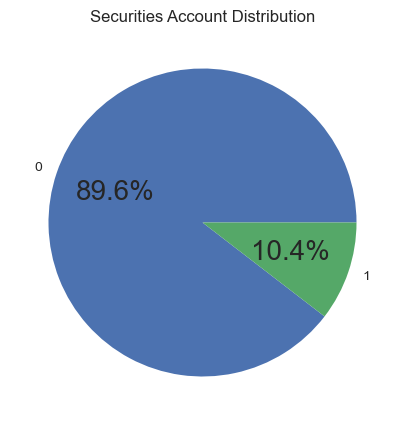

In [39]:
plt.figure(figsize=(5, 5))
y = df['Securities Account'].value_counts().values
#Mylabels = df.Family.drop_duplicates()
mylabels = df['Securities Account'].value_counts().index

plt.pie(y , labels = mylabels , autopct='%1.1f%%')
plt.title('Securities Account Distribution')
plt.show() 

Securities Account: Around 90% of customers do not have a securities account with the bank.

In [40]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

## Correlation

In [41]:
royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
royalblue_r = royalblue.reversed()

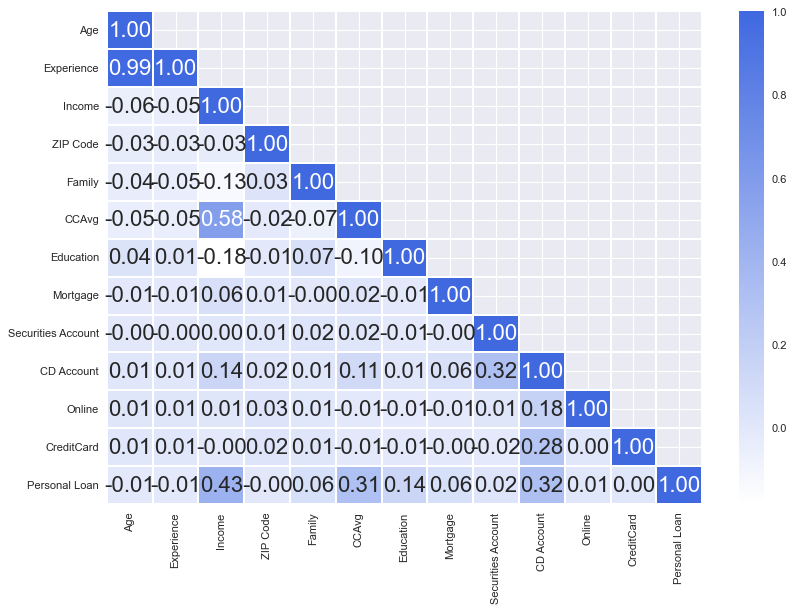

In [42]:
# Calculation of the Spearman correlation
target = 'Personal Loan'
df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
corr = df_ordered.corr(method='spearman')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=royalblue, fmt='.2f', linewidths=0.2)
plt.show()

Personal Loan is highly correlated with Income, CD_Account, CCAvg.
Experience is highly correlated with Age. (ρ = 0.99)
CCAvg is correlated with Income to a good extent. (ρ = 0.58)

In the dataset, CCAVG represents average monthly credit card spending, but Income represents the amount of annual income. To make the units of the features equal, we convert average monthly credit card spending to annual:

In [43]:
df['CCAvg'] = df['CCAvg']*12

In [44]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

## Logistic Regression

In [45]:
x = df.drop('Personal Loan' , axis=1).values
y = df['Personal Loan'].values.reshape(-1 , 1)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.3 ,random_state=0)

In [47]:
logreg = LogisticRegression (solver='liblinear')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

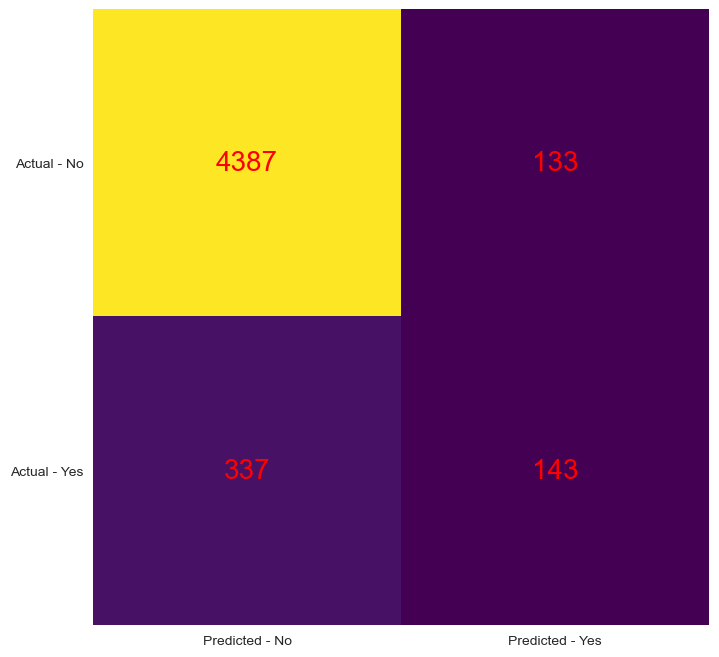

In [48]:
plt.rcParams.update({'font.size': 20})
cm = confusion_matrix (y , logreg.predict(x))

fig,ax = plt.subplots(figsize= (8,8))
ax.imshow(cm, cmap=plt.cm.viridis, interpolation='nearest')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted - No', 'Predicted - Yes' ))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual - No', 'Actual - Yes'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center', va='center', color ='red')  
        
plt.show() 

In [49]:
def get_score(model):
    '''
    Prints the recall score from model
    model : classifier to predict values of X
    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Accuracy Score on training set : ", metrics.accuracy_score(y_train, pred_train))
    print("Accuracy Score on test set : ", metrics.accuracy_score(y_test, pred_test))
    print("-------------------------------------------------------------")
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
    print("-------------------------------------------------------------")
    print("F1 Score on training set : ", metrics.f1_score(y_train, pred_train))
    print("F1 Score on test set : ", metrics.f1_score(y_test, pred_test))
    print("-------------------------------------------------------------")
    print("Precision Score on training set : ", metrics.precision_score(y_train, pred_train))
    print("Precision Score on test set : ", metrics.precision_score(y_test, pred_test))

In [50]:
get_score(logreg)

Accuracy Score on training set :  0.8985714285714286
Accuracy Score on test set :  0.9233333333333333
-------------------------------------------------------------
Recall on training set :  0.26988636363636365
Recall on test set :  0.375
-------------------------------------------------------------
F1 Score on training set :  0.34862385321100914
F1 Score on test set :  0.4549763033175355
-------------------------------------------------------------
Precision Score on training set :  0.49222797927461137
Precision Score on test set :  0.5783132530120482


## KNN

In [51]:
x = df.drop('Personal Loan' , axis=1).values
y = df['Personal Loan'].values.reshape(-1 , 1)

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.3 ,random_state=0)

one of the Key factor in KNN is selecting a good number for n_neighbors!
here we try two ways for founding the best selection!
that two ways are: GridSearchCV and Train&Test accuracy plot!

In [53]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
n_neighbors = list(range(1, 20))
param_grid = dict(n_neighbors= n_neighbors)
grid = GridSearchCV(knn, param_grid , scoring = 'accuracy' , cv=5 , verbose=1, n_jobs =-1) # determine the best k for model
grid_search= grid.fit(x_train,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


In [54]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 2}
Accuracy for our training dataset with tuning is : 90.06%


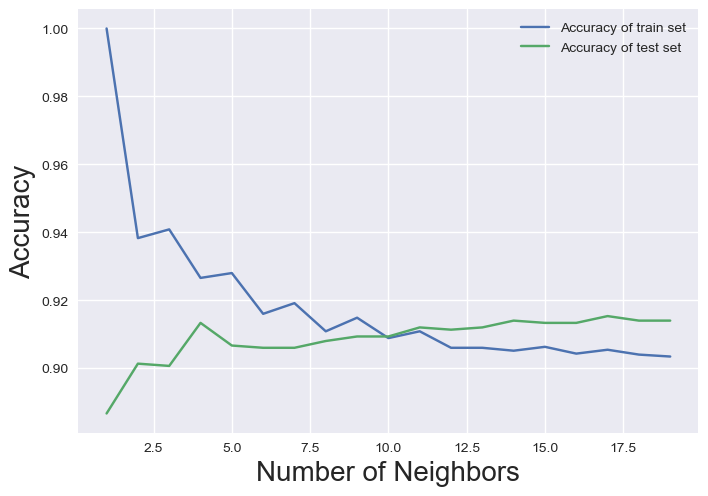

In [55]:
training_acc = []
test_acc = []

neighbors_setting = range(1 , 20)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train , y_train.ravel())
    training_acc.append(knn.score(x_train , y_train))
    test_acc.append(knn.score(x_test , y_test))
    
plt.plot(neighbors_setting , training_acc , label = 'Accuracy of train set')
plt.plot(neighbors_setting , test_acc , label = 'Accuracy of test set')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

as you see 11 is good selection for knn n_neighbors because in this point Train and test accuracy are close together and both them have high accuracy!

In [56]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [57]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

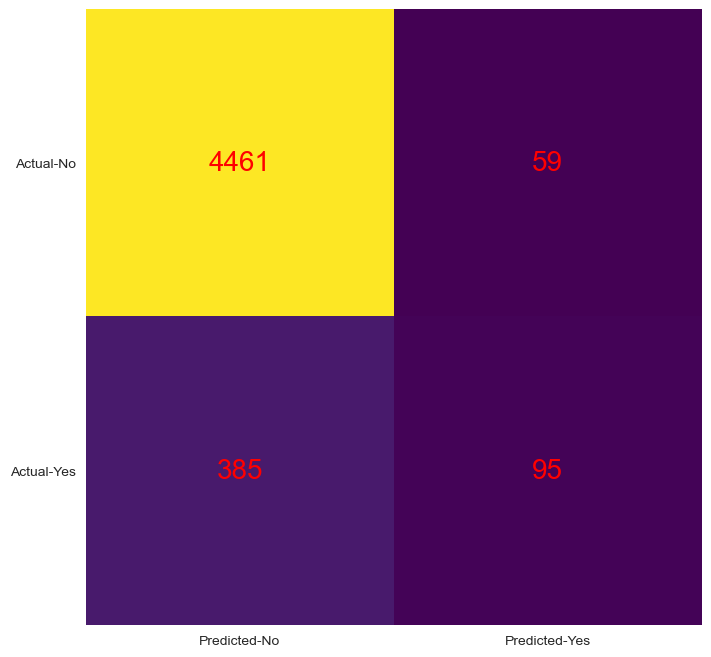

In [58]:
cm = confusion_matrix (y , knn.predict(x))

fig,ax = plt.subplots(figsize= (8,8))
ax.imshow(cm, cmap=plt.cm.viridis, interpolation='nearest')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted-No', 'Predicted-Yes'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual-No', 'Actual-Yes'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center', va='center', color ='red')
plt.show() 

In [59]:
get_score(knn)

Accuracy Score on training set :  0.9108571428571428
Accuracy Score on test set :  0.912
-------------------------------------------------------------
Recall on training set :  0.21875
Recall on test set :  0.140625
-------------------------------------------------------------
F1 Score on training set :  0.33047210300429186
F1 Score on test set :  0.2142857142857143
-------------------------------------------------------------
Precision Score on training set :  0.6754385964912281
Precision Score on test set :  0.45


## Naive Bayes

### Gaussian

In [60]:
nb_model=GaussianNB()

In [61]:
nb_model.fit(x_train,y_train)

GaussianNB()

In [62]:
X_test_pred = nb_model.predict(x_test)
X_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

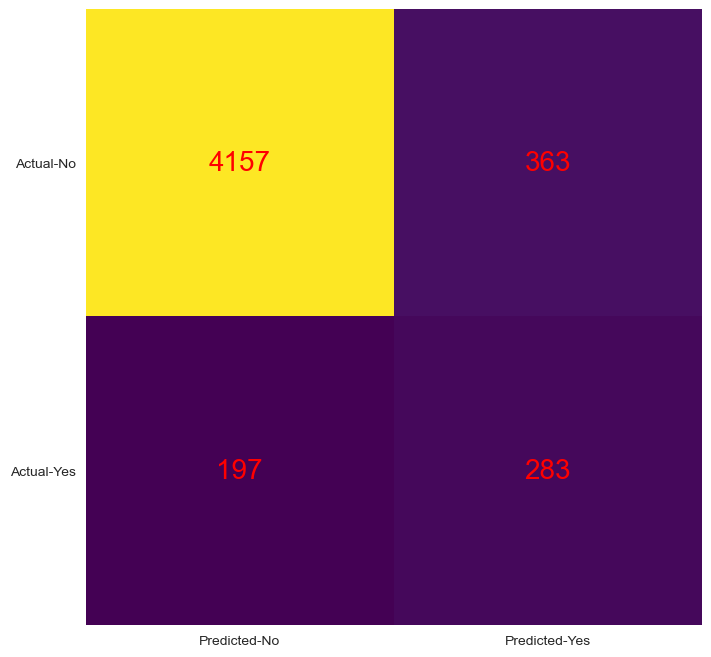

In [63]:
cm = confusion_matrix (y , nb_model.predict(x))

fig,ax = plt.subplots(figsize= (8,8))
ax.imshow(cm, cmap=plt.cm.viridis, interpolation='nearest')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted-No', 'Predicted-Yes'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual-No', 'Actual-Yes'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center', va='center', color ='red')
plt.show() 

In [64]:
get_score(nb_model)

Accuracy Score on training set :  0.8877142857142857
Accuracy Score on test set :  0.8886666666666667
-------------------------------------------------------------
Recall on training set :  0.5909090909090909
Recall on test set :  0.5859375
-------------------------------------------------------------
F1 Score on training set :  0.5142150803461063
F1 Score on test set :  0.47318611987381703
-------------------------------------------------------------
Precision Score on training set :  0.4551422319474836
Precision Score on test set :  0.3968253968253968


In [65]:
kfold_validation = KFold(10)

In [66]:
results = cross_val_score (nb_model, x_train, y_train, cv = kfold_validation)

In [67]:
print(results)
print(np.mean(results))

[0.88285714 0.88285714 0.89714286 0.89142857 0.90857143 0.84857143
 0.86857143 0.88       0.90857143 0.88571429]
0.8854285714285715


### Multinomial

In [68]:
clf = MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

In [69]:
X_test_pred = clf.predict(x_test)
X_test_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

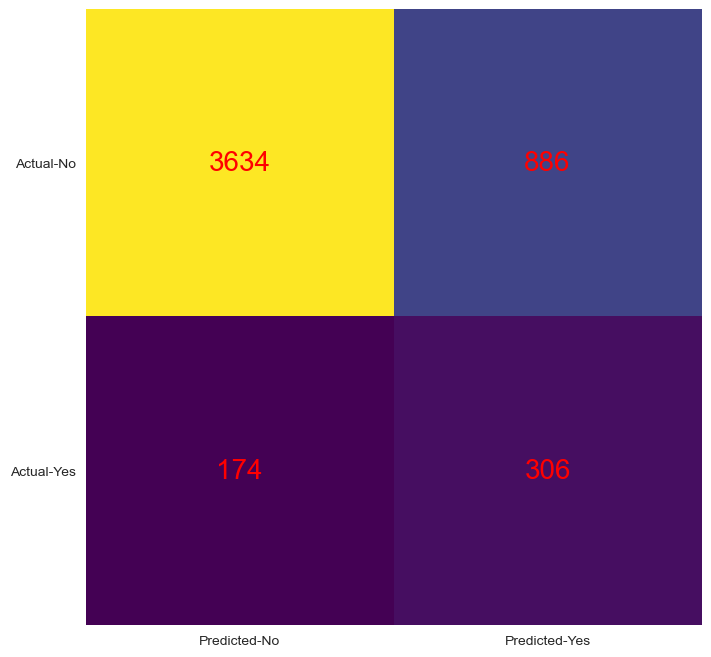

In [70]:
cm = confusion_matrix (y , clf.predict(x))

fig,ax = plt.subplots(figsize= (8,8))
ax.imshow(cm, cmap=plt.cm.viridis, interpolation='nearest')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted-No', 'Predicted-Yes'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual-No', 'Actual-Yes'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center', va='center', color ='red')
plt.show() 

==> Logistic regression has the best score between other models so we continue modeling with this algorithm!